# Google Data Analytics - Cyclistic Case Study

## 1. Importing packages

In [1]:
import pandas as pd
import time
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from scipy.stats import norm
import warnings
import math
warnings.filterwarnings('ignore')

## 2. Loading the data from CSV File

### 2.1 Loading the data using pandas and creating a DataFrame

In [2]:
df_data1 = pd.read_csv('./Resources/202107-divvy-tripdata.csv')
df_data2 = pd.read_csv('./Resources/202108-divvy-tripdata.csv')
df_data3 = pd.read_csv('./Resources/202109-divvy-tripdata.csv')
df_data4 = pd.read_csv('./Resources/202110-divvy-tripdata.csv')
df_data5 = pd.read_csv('./Resources/202111-divvy-tripdata.csv')
df_data6 = pd.read_csv('./Resources/202112-divvy-tripdata.csv')
df_data7 = pd.read_csv('./Resources/202201-divvy-tripdata.csv')
df_data8 = pd.read_csv('./Resources/202202-divvy-tripdata.csv')
df_data9 = pd.read_csv('./Resources/202203-divvy-tripdata.csv')
df_data10 = pd.read_csv('./Resources/202204-divvy-tripdata.csv')
df_data11 = pd.read_csv('./Resources/202205-divvy-tripdata.csv')
df_data12 = pd.read_csv('./Resources/202206-divvy-tripdata.csv')
lst_df = [df_data1,df_data2,df_data3,df_data4,df_data5,df_data6,df_data7,df_data8,df_data9,df_data10,df_data11,df_data12]
df_trips = pd.concat(lst_df, ignore_index=True, sort=False)


### 2.2 Looking how our dataset looks like 
 

In [3]:
df_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual


In [4]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900385 entries, 0 to 5900384
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 585.2+ MB


## 3. Exploratory Data Analysis

### 3.1 Remove Duplicated Rows

In [5]:
df_trips2 = df_trips.drop_duplicates()
print("Duplicated Lines Removed: "+ str(df_trips2.shape[0] - df_trips.shape[0]))

Duplicated Lines Removed: 0


### 3.2 Check for missing values

<AxesSubplot:>

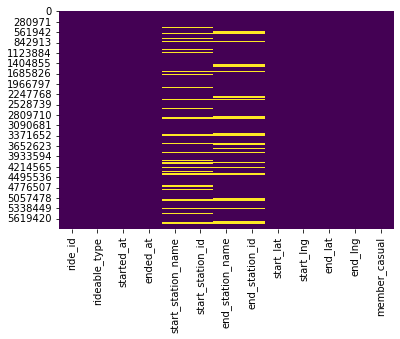

In [6]:
#Let's analyze the distribution of missing values
sns.heatmap(df_trips.isnull(),cbar=False,cmap='viridis')

In [7]:
df_trips = df_trips[df_trips.start_station_name.notnull() & df_trips.start_station_id.notnull()]

In [8]:
df_trips = df_trips[df_trips.end_station_name.notnull() & df_trips.end_station_id.notnull()]

<AxesSubplot:>

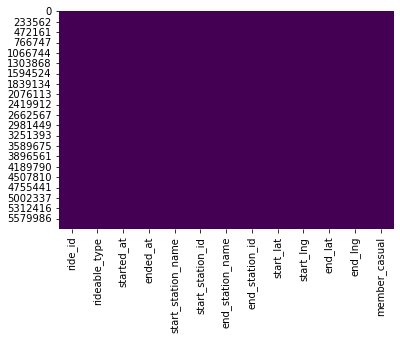

In [9]:
#Let's analyze the distribution of missing values
sns.heatmap(df_trips.isnull(),cbar=False,cmap='viridis')

In [11]:
df_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual


In [12]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4678871 entries, 0 to 5900384
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 499.8+ MB


In [13]:
df_trips['started_at'] = pd.to_datetime(df_trips['started_at'])
df_trips['ended_at'] = pd.to_datetime(df_trips['ended_at'])

In [14]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4678871 entries, 0 to 5900384
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 499.8+ MB


In [15]:
df_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual


In [16]:
df_trips['trip_duration'] = (df_trips['ended_at'] - df_trips['started_at']) / np.timedelta64(1, 's')

In [38]:
df_trips['month'] =  pd.DatetimeIndex(df_trips['started_at']).month
df_trips['year'] =  pd.DatetimeIndex(df_trips['started_at']).year
df_trips['weekday'] =  pd.DatetimeIndex(df_trips['started_at']).weekday
df_trips['hour'] =  pd.DatetimeIndex(df_trips['started_at']).hour

In [39]:
df_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,month,year,weekday,hour
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual,2122.0,7,2021,4,14
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual,1107.0,7,2021,2,16
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member,1070.0,7,2021,6,11
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member,902.0,7,2021,3,22
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual,1143.0,7,2021,2,16


In [40]:
df_trips.describe()

,start_lat,start_lng,end_lat,end_lng,trip_duration,month,year,weekday,hour
count,4.638073e+06,4.638073e+06,4.638073e+06,4.638073e+06,4.638073e+06,4.638073e+06,4.638073e+06,4.638073e+06,4.638073e+06
mean,4.190270e+01,-8.764409e+01,4.190299e+01,-8.764434e+01,1.165737e+03,7.219978e+00,2.021380e+03,3.125399e+00,1.420928e+01
std,4.102102e-02,2.463299e-02,4.115448e-02,2.400917e-02,7.150180e+03,2.506306e+00,4.854129e-01,1.996430e+00,5.005996e+00
min,4.164850e+01,-8.783325e+01,4.164850e+01,-8.783000e+01,3.000000e+01,1.000000e+00,2.021000e+03,0.000000e+00,0.000000e+00
25%,4.188202e+01,-8.765694e+01,4.188213e+01,-8.765703e+01,3.970000e+02,6.000000e+00,2.021000e+03,1.000000e+00,1.100000e+01
50%,4.189756e+01,-8.764115e+01,4.189776e+01,-8.764117e+01,6.910000e+02,7.000000e+00,2.021000e+03,3.000000e+00,1.500000e+01
75%,4.192628e+01,-8.762784e+01,4.192871e+01,-8.762784e+01,1.242000e+03,9.000000e+00,2.022000e+03,5.000000e+00,1.800000e+01
max,4.563503e+01,-7.379648e+01,4.216812e+01,-8.752740e+01,2.946429e+06,1.200000e+01,2.022000e+03,6.000000e+00,2.300000e+01


In [41]:
df_trips = df_trips[df_trips['trip_duration'] >= 30]

In [42]:
df_trips.describe()

,start_lat,start_lng,end_lat,end_lng,trip_duration,month,year,weekday,hour
count,4.638073e+06,4.638073e+06,4.638073e+06,4.638073e+06,4.638073e+06,4.638073e+06,4.638073e+06,4.638073e+06,4.638073e+06
mean,4.190270e+01,-8.764409e+01,4.190299e+01,-8.764434e+01,1.165737e+03,7.219978e+00,2.021380e+03,3.125399e+00,1.420928e+01
std,4.102102e-02,2.463299e-02,4.115448e-02,2.400917e-02,7.150180e+03,2.506306e+00,4.854129e-01,1.996430e+00,5.005996e+00
min,4.164850e+01,-8.783325e+01,4.164850e+01,-8.783000e+01,3.000000e+01,1.000000e+00,2.021000e+03,0.000000e+00,0.000000e+00
25%,4.188202e+01,-8.765694e+01,4.188213e+01,-8.765703e+01,3.970000e+02,6.000000e+00,2.021000e+03,1.000000e+00,1.100000e+01
50%,4.189756e+01,-8.764115e+01,4.189776e+01,-8.764117e+01,6.910000e+02,7.000000e+00,2.021000e+03,3.000000e+00,1.500000e+01
75%,4.192628e+01,-8.762784e+01,4.192871e+01,-8.762784e+01,1.242000e+03,9.000000e+00,2.022000e+03,5.000000e+00,1.800000e+01
max,4.563503e+01,-7.379648e+01,4.216812e+01,-8.752740e+01,2.946429e+06,1.200000e+01,2.022000e+03,6.000000e+00,2.300000e+01


In [44]:
df_trips["month_text"] = df_trips["month"]
df_trips["weekday_text"] = df_trips["weekday"]

In [45]:
number_to_text = {"month_text":     {1: "January", 2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"},
                "weekday_text": {0: "Monday", 1: "Tuesday", 2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}}

In [46]:
df_trips = df_trips.replace(number_to_text)

In [47]:
df_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,month,year,weekday,hour,month_text,weekday_text
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual,2122.0,7,2021,4,14,July,Friday
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual,1107.0,7,2021,2,16,July,Wednesday
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member,1070.0,7,2021,6,11,July,Sunday
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member,902.0,7,2021,3,22,July,Thursday
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual,1143.0,7,2021,2,16,July,Wednesday


In [51]:
df_station_start = df_trips.groupby('start_station_id').agg({'start_lat':'mean','start_lng':'mean'}).reset_index()

In [52]:
df_station_start.to_csv("./Resources/station_start.csv",index=False)

In [53]:
df_trips.to_csv("./Resources/12_months_divvy_tripdata.csv",index=False)

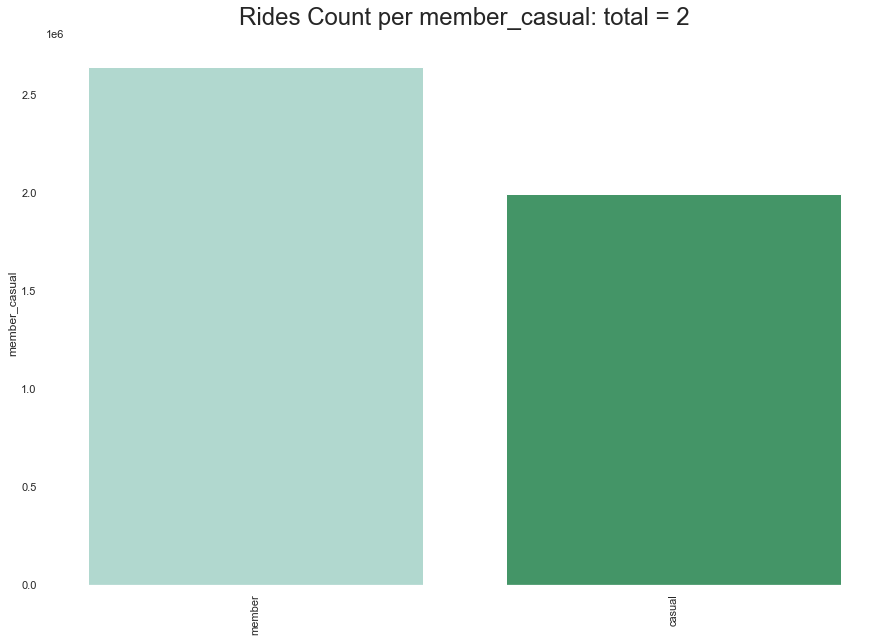

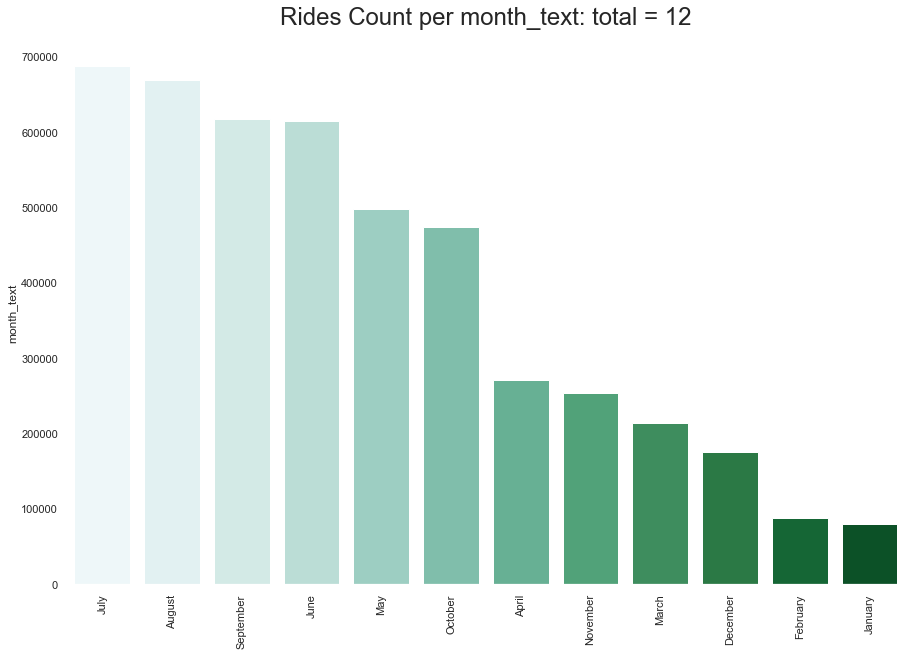

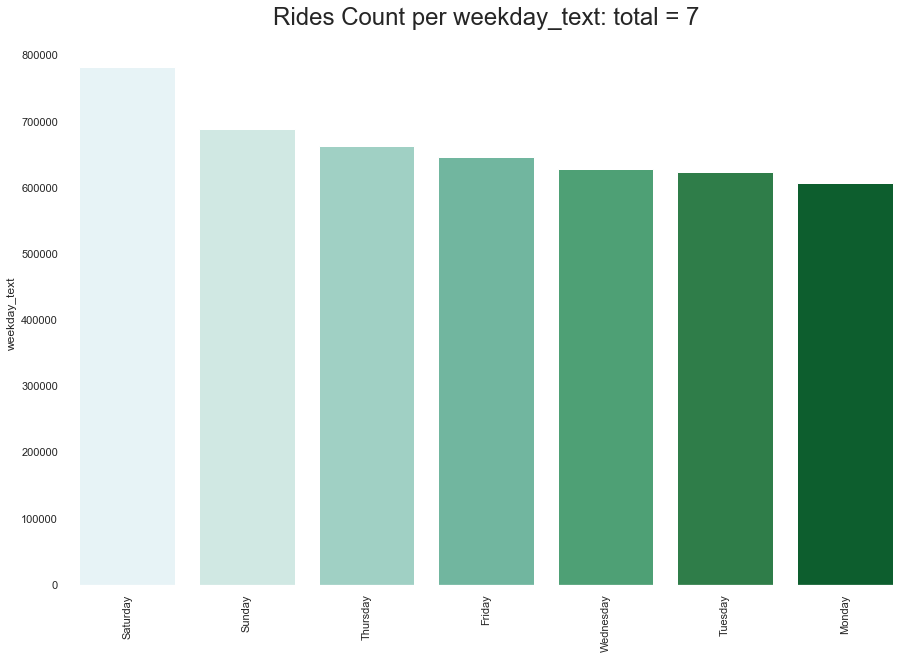

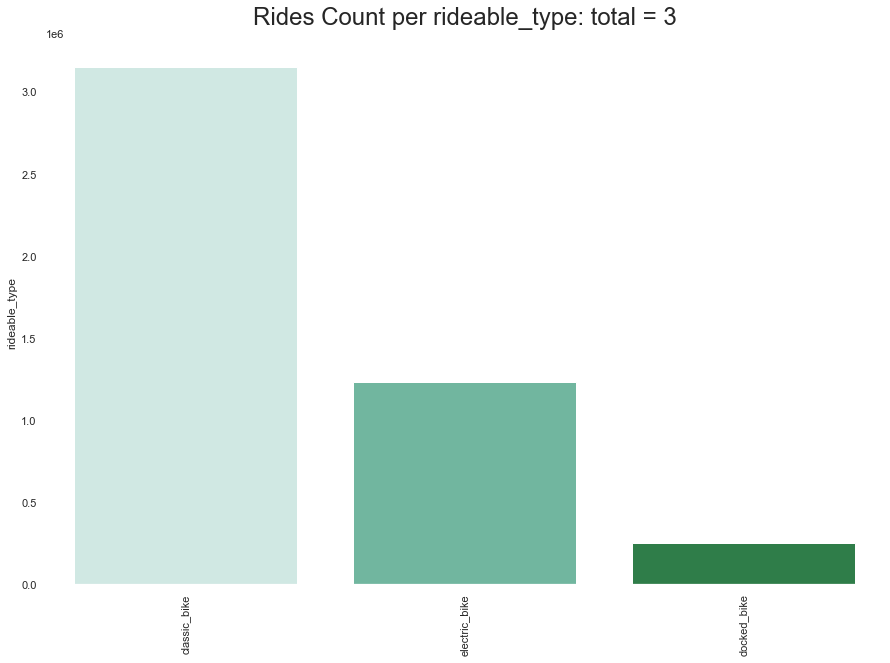

In [55]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
for i in df_trips[['member_casual','month_text','weekday_text','rideable_type']].columns:
    cat_num = df_trips[i].value_counts()[:12]
    chart = sns.barplot(x=cat_num.index, y=cat_num, palette='BuGn')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    chart.set_title("Rides Count per %s: total = %d" % (i, len(cat_num)), fontdict={'fontsize':24}, pad=16)
    plt.show()